In [1]:
import os

In [2]:
os.chdir(r"C:\Users\chira\Desktop\property price EDA")

In [3]:
import pandas as pd

In [4]:
pd.set_option("display.max_column",None)

In [5]:
import warnings

In [6]:
from warnings import filterwarnings

In [7]:
filterwarnings("ignore")

In [8]:
import numpy as np

In [9]:
import matplotlib.pyplot as plt

In [10]:
import seaborn as sns

In [11]:
from scipy import stats

In [12]:
import statsmodels.api as sm

In [288]:
from statsmodels.formula.api import ols

In [289]:
import statsmodels.formula.api as smf

In [14]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [15]:
from scipy.stats import chi2, chi2_contingency

In [16]:
df = pd.read_csv("Property_Price_Train.csv")

In [17]:
df = pd.DataFrame(df)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1459 non-null   int64  
 1   Building_Class             1459 non-null   int64  
 2   Zoning_Class               1459 non-null   object 
 3   Lot_Extent                 1200 non-null   float64
 4   Lot_Size                   1459 non-null   int64  
 5   Road_Type                  1459 non-null   object 
 6   Lane_Type                  91 non-null     object 
 7   Property_Shape             1459 non-null   object 
 8   Land_Outline               1459 non-null   object 
 9   Utility_Type               1459 non-null   object 
 10  Lot_Configuration          1459 non-null   object 
 11  Property_Slope             1459 non-null   object 
 12  Neighborhood               1459 non-null   object 
 13  Condition1                 1459 non-null   objec

<AxesSubplot:>

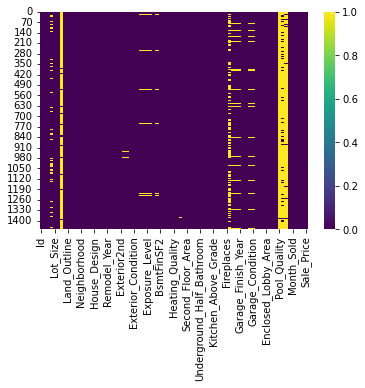

In [19]:
df.isnull().sum()
sns.heatmap(df.isnull(),cmap = "viridis")

In [20]:
var = pd.isnull(df).sum()

In [21]:
var1 = var>0
var[var1]

Lot_Extent                259
Lane_Type                1368
Brick_Veneer_Type           8
Brick_Veneer_Area           8
Basement_Height            37
Basement_Condition         37
Exposure_Level             38
BsmtFinType1               37
BsmtFinType2               38
Electrical_System           1
Fireplace_Quality         689
Garage                     81
Garage_Built_Year          81
Garage_Finish_Year         81
Garage_Quality             81
Garage_Condition           81
Pool_Quality             1452
Fence_Quality            1178
Miscellaneous_Feature    1405
dtype: int64

In [22]:
df.Sale_Price.value_counts()

140000    20
135000    17
155000    14
145000    14
190000    13
          ..
202665     1
164900     1
208300     1
181500     1
142125     1
Name: Sale_Price, Length: 662, dtype: int64

In [23]:
df.Sale_Price.value_counts().sum()

1459

In [24]:
df.Sale_Price.describe()

count      1459.000000
mean     180944.102810
std       79464.918335
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: Sale_Price, dtype: float64

Text(0.5, 1.0, 'Histogram of Sale_Price')

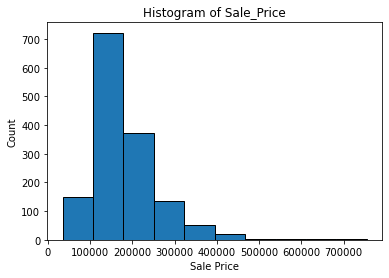

In [25]:
plt.hist(df.Sale_Price,edgecolor = "black")
plt.xlabel("Sale Price")
plt.ylabel("Count")
plt.title("Histogram of Sale_Price")

Text(0.5, 1.0, 'Box plot of Sale_Price')

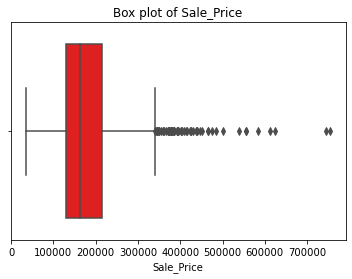

In [26]:
sns.boxplot(x = df.Sale_Price, data =df, color = 'r')
plt.title('Box plot of Sale_Price')

In [27]:
IQR = df.Sale_Price.quantile(.75) - df.Sale_Price.quantile(.25)
IQR

84050.0

In [28]:
upper_limit = df.Sale_Price.quantile(.75) + (1.5*IQR)
upper_limit

340075.0

In [29]:
lower_limit = df.Sale_Price.quantile(.25) - (1.5*IQR)
lower_limit

3875.0

In [30]:
len(df.Sale_Price[df.Sale_Price < lower_limit])

0

In [31]:
df['Sale_Price'] = np.where(df['Sale_Price'] > upper_limit, upper_limit, df['Sale_Price']) 

Text(0.5, 1.0, 'Box plot of Sale_Price')

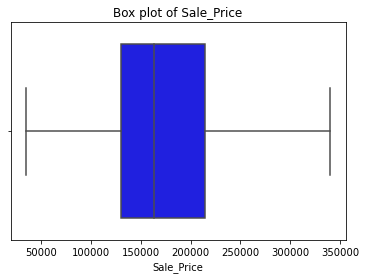

In [32]:
sns.boxplot(x = df.Sale_Price, data =df, color = 'b')
plt.title('Box plot of Sale_Price')

Text(0.5, 1.0, 'Histogram of Sale_Price')

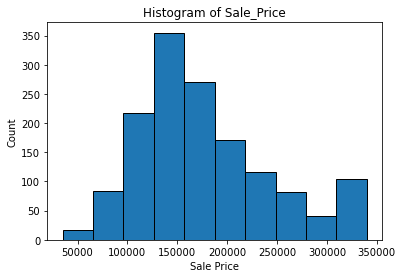

In [33]:
plt.hist(df.Sale_Price,edgecolor = "black")
plt.xlabel("Sale Price")
plt.ylabel("Count")
plt.title("Histogram of Sale_Price")

Text(0.5, 1.0, 'Normality of Sale_Price')

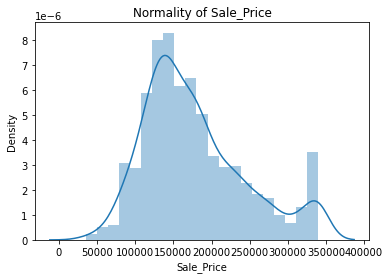

In [34]:
sns.distplot(df.Sale_Price)
plt.title('Normality of Sale_Price')

# 1.Building_Class

In [35]:
df.Building_Class.isnull().sum()

0

In [36]:
df.Building_Class.value_counts()

20     535
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: Building_Class, dtype: int64

In [37]:
df.Building_Class.value_counts().sum()

1459

Text(0.5, 1.0, 'Count plot of Building_Class')

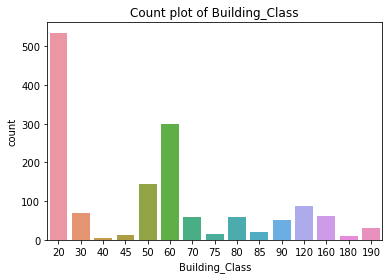

In [38]:
sns.countplot(df.Building_Class)
plt.title('Count plot of Building_Class')

In [39]:
mod = ols('Sale_Price ~ Building_Class', data = df).fit()
print(sm.stats.anova_lm(mod))

                    df        sum_sq       mean_sq         F    PR(>F)
Building_Class     1.0  4.813381e+10  4.813381e+10  10.72097  0.001084
Residual        1457.0  6.541475e+12  4.489688e+09       NaN       NaN


In [40]:
f_Building_Class = pairwise_tukeyhsd(df.Sale_Price, df.Building_Class )
print(f_Building_Class)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj     lower        upper    reject
-----------------------------------------------------------------
    20     30  -85625.2735  0.001 -110295.2446 -60955.3024   True
    20     40  -25329.9981    0.9  -122121.918  71461.9217  False
    20     45  -72863.3315 0.0011 -129159.3599  -16567.303   True
    20     50  -38921.8176  0.001  -57028.0611  -20815.574   True
    20     60   49012.9484  0.001   35087.0844  62938.8123   True
    20     70  -14999.6648 0.8079  -41257.4188  11258.0892  False
    20     75    2549.6894    0.9  -46382.0355  51481.4143  False
    20     80  -11803.3602    0.9  -38465.0743  14858.3539  False
    20     85  -33644.9981 0.3716  -77569.4359  10279.4396  False
    20     90  -47913.9212  0.001   -75929.016 -19898.8264   True
    20    120   18408.6341  0.245     -3886.51  40703.7781  False
    20    160  -42807.6172  0.001  -68497.0807 -17118.1537   True
    20    

In [41]:
df['Building_Class'].replace(40, 20, inplace = True)
df['Building_Class'].replace(70, 20, inplace = True)
df['Building_Class'].replace(75, 20, inplace = True)
df['Building_Class'].replace(80, 20, inplace = True)
df['Building_Class'].replace(150, 20, inplace = True)
df['Building_Class'].replace(45, 30, inplace = True)
df['Building_Class'].replace(180, 30, inplace = True)
df['Building_Class'].replace(190, 30, inplace = True)
df['Building_Class'].replace(85, 50, inplace = True)
df['Building_Class'].replace(90, 50, inplace = True)
df['Building_Class'].replace(160, 50, inplace = True)

In [42]:
df["Building_Class"].value_counts()

20     673
60     299
50     279
30     121
120     87
Name: Building_Class, dtype: int64

In [43]:
mod = ols('Sale_Price ~ Building_Class', data = df).fit()
print(sm.stats.anova_lm(mod))

                    df        sum_sq       mean_sq         F        PR(>F)
Building_Class     1.0  1.922314e+11  1.922314e+11  43.78061  5.145796e-11
Residual        1457.0  6.397377e+12  4.390788e+09       NaN           NaN


In [44]:
f_Building_Class= pairwise_tukeyhsd(df.Sale_Price, df.Building_Class, alpha = 0.05)
print(f_Building_Class)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
    20     30  -73004.364  0.001 -88341.2853 -57667.4426   True
    20     50 -38652.5096  0.001  -49712.048 -27592.9713   True
    20     60  51457.3759  0.001  40662.4873  62252.2645   True
    20    120  20853.0616 0.0115   3157.3596  38548.7636   True
    30     50  34351.8543  0.001  17444.9784  51258.7303   True
    30     60 124461.7399  0.001 107726.7859 141196.6939   True
    30    120  93857.4256  0.001  72024.7223 115690.1289   True
    50     60  90109.8856  0.001  77181.1998 103038.5713   True
    50    120  59505.5713  0.001  40433.0999  78578.0426   True
    60    120 -30604.3143  0.001  -49524.552 -11684.0766   True
---------------------------------------------------------------


Text(0.5, 1.0, 'Count plot of Building_Class')

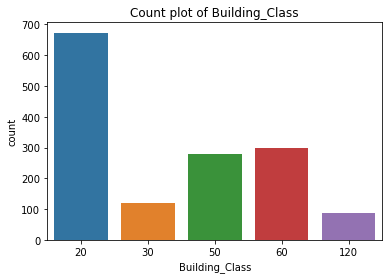

In [45]:
sns.countplot(df.Building_Class)
plt.title('Count plot of Building_Class')

Text(0.5, 1.0, 'Building_Class vs Sale_Price')

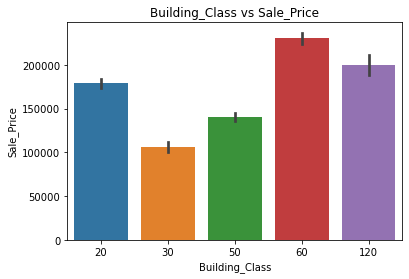

In [46]:
sns.barplot(x=df.Building_Class, y = df.Sale_Price)
plt.title('Building_Class vs Sale_Price')

good predictor

# 2.Zoning_Class

In [47]:
df.Zoning_Class.isnull().sum()

0

In [48]:
df.Zoning_Class.value_counts()

RLD       1150
RMD        218
FVR         65
RHD         16
Commer      10
Name: Zoning_Class, dtype: int64

In [49]:
df.Zoning_Class.value_counts().sum()

1459

Text(0.5, 1.0, 'Count plot of Zoning_Class')

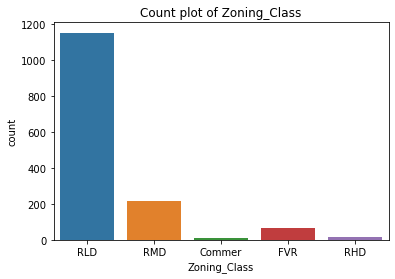

In [50]:
sns.countplot(df.Zoning_Class)
plt.title('Count plot of Zoning_Class')

In [51]:
mod = ols('Sale_Price ~ Zoning_Class', data = df).fit()
print(sm.stats.anova_lm(mod))

                  df        sum_sq       mean_sq          F        PR(>F)
Zoning_Class     4.0  9.114909e+11  2.278727e+11  58.351541  1.005486e-45
Residual      1454.0  5.678118e+12  3.905171e+09        NaN           NaN


In [52]:
f_Zoning_Class = pairwise_tukeyhsd(df.Sale_Price, df.Zoning_Class )
print(f_Zoning_Class)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
Commer    FVR 139012.1692  0.001   81036.3918 196987.9467   True
Commer    RHD   57030.375 0.1574  -11771.3474 125832.0974  False
Commer    RLD  112149.193  0.001   57942.5263 166355.8597   True
Commer    RMD  50929.4266 0.0869    -4267.107 106125.9602  False
   FVR    RHD -81981.7942  0.001 -129613.7559 -34349.8326   True
   FVR    RLD -26862.9762 0.0069  -48622.7897  -5103.1627   True
   FVR    RMD -88082.7426  0.001 -112202.9435 -63962.5417   True
   RHD    RLD   55118.818 0.0043   12153.9986  98083.6375   True
   RHD    RMD  -6100.9484    0.9  -50308.0782  38106.1814  False
   RLD    RMD -61219.7664  0.001  -73827.5432 -48611.9897   True
----------------------------------------------------------------


In [53]:
df["Zoning_Class"].replace("RHD","RMD",inplace = True)



In [54]:
mod= ols("Sale_Price~Zoning_Class",data =df).fit()
sm.stats.anova_lm(mod)

,df,sum_sq,mean_sq,F,PR(>F)
Zoning_Class,3.0,9.109361e+11,3.036454e+11,77.800571,1.121890e-46
Residual,1455.0,5.678673e+12,3.902868e+09,NaN,NaN


In [55]:
f_Zoning_Class = pairwise_tukeyhsd(df.Sale_Price, df.Zoning_Class )
print(f_Zoning_Class)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
Commer    FVR 139012.1692  0.001   84431.4561 193592.8824   True
Commer    RLD  112149.193  0.001   61116.8713 163181.5148   True
Commer    RMD  51346.5855 0.0537    -539.6589 103232.8299  False
   FVR    RLD -26862.9762 0.0043   -47348.534  -6377.4184   True
   FVR    RMD -87665.5838  0.001 -110194.2894 -65136.8782   True
   RLD    RMD -60802.6076  0.001  -72325.8964 -49279.3187   True
----------------------------------------------------------------


In [56]:
df["Zoning_Class"].replace("Commer","RMD",inplace = True)

In [57]:
mod= ols("Sale_Price~Zoning_Class",data =df).fit()
sm.stats.anova_lm(mod)

,df,sum_sq,mean_sq,F,PR(>F)
Zoning_Class,2.0,8.856519e+11,4.428259e+11,113.036363,2.325354e-46
Residual,1456.0,5.703957e+12,3.917553e+09,NaN,NaN


In [58]:
f_Zoning_Class = pairwise_tukeyhsd(df.Sale_Price, df.Zoning_Class )
print(f_Zoning_Class)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
   FVR    RLD -26862.9762 0.0023  -45584.5975  -8141.3549   True
   FVR    RMD  -89769.952  0.001 -110266.8701  -69273.034   True
   RLD    RMD -62906.9758  0.001  -73257.1694 -52556.7823   True
----------------------------------------------------------------


In [59]:
df.Zoning_Class.value_counts()

RLD    1150
RMD     244
FVR      65
Name: Zoning_Class, dtype: int64

Text(0.5, 1.0, 'Count plot of Zoning_Class')

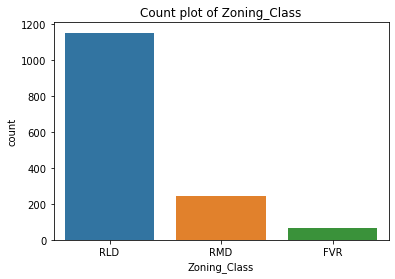

In [60]:
sns.countplot(df.Zoning_Class)
plt.title('Count plot of Zoning_Class')

Text(0.5, 1.0, 'Zoning_Class vs Sale_Price')

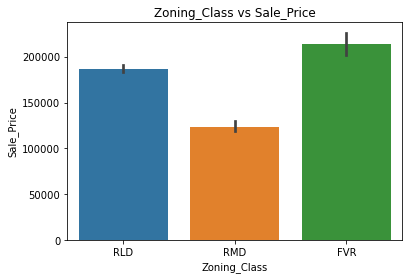

In [61]:
sns.barplot(x=df.Zoning_Class, y = df.Sale_Price)
plt.title('Zoning_Class vs Sale_Price')

good predictor

# 3.Lot Size

In [62]:
df.Lot_Size.isnull().sum()

0

In [63]:
df.Lot_Size.value_counts()

7200     25
9600     24
6000     17
8400     14
10800    14
         ..
11423     1
14601     1
4058      1
17104     1
9717      1
Name: Lot_Size, Length: 1073, dtype: int64

In [64]:
df.Lot_Size.value_counts().sum()

1459

Text(0.5, 1.0, 'Hist of Lot_Size')

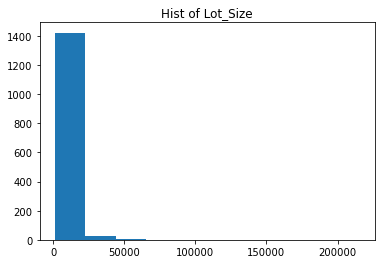

In [65]:
plt.hist(df.Lot_Size)
plt.title('Hist of Lot_Size')

Text(0.5, 1.0, 'Box plot of Lot_Size')

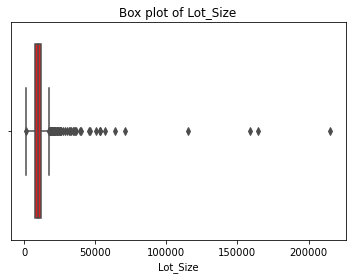

In [66]:
sns.boxplot(x = df.Lot_Size, data =df, color = 'r')
plt.title('Box plot of Lot_Size')

In [67]:
df.Lot_Size.describe()

count      1459.000000
mean      10517.225497
std        9984.675721
min        1300.000000
25%        7549.000000
50%        9477.000000
75%       11603.000000
max      215245.000000
Name: Lot_Size, dtype: float64

In [68]:
IQR = df.Lot_Size.quantile(.75) - df.Lot_Size.quantile(.25)
IQR

4054.0

In [69]:
upper_limit = df.Lot_Size.quantile(.75) + (1.5*IQR)
upper_limit

17684.0

In [70]:
lower_limit = df.Lot_Size.quantile(.25) - (1.5*IQR)
lower_limit

1468.0

In [71]:
df['Lot_Size'] = np.where(df['Lot_Size'] > upper_limit, upper_limit, df['Lot_Size']) 

In [72]:
df['Lot_Size'] = np.where(df['Lot_Size'] < lower_limit, lower_limit, df['Lot_Size'])

Text(0.5, 1.0, 'Box plot of Lot_Size')

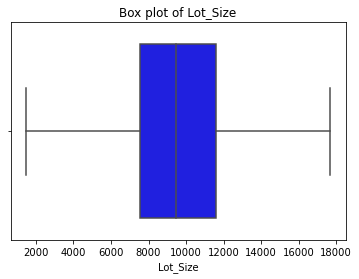

In [73]:
sns.boxplot(x = df.Lot_Size, data =df, color = 'b')
plt.title('Box plot of Lot_Size')

Text(0.5, 1.0, 'Hist of Lot_Size')

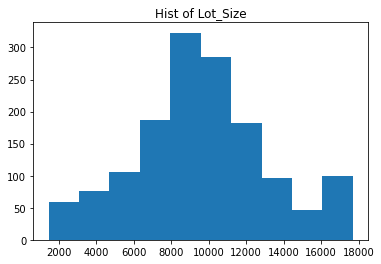

In [74]:
plt.hist(df.Lot_Size)
plt.title('Hist of Lot_Size')

In [75]:
import scipy

In [76]:
np.corrcoef(df.Lot_Size, df.Sale_Price)

array([[1.        , 0.43588661],
       [0.43588661, 1.        ]])

Text(0.5, 1.0, 'Scatter plot of Lot_Size vs Sale_Price')

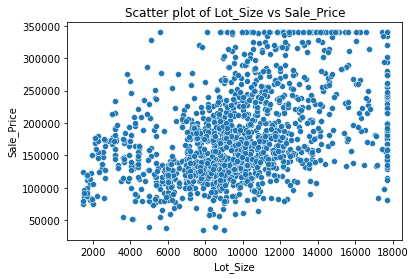

In [77]:
sns.scatterplot(x = df['Lot_Size'], y = df.Sale_Price, data = df )
plt.xlabel('Lot_Size')
plt.ylabel('Sale_Price')
plt.title('Scatter plot of Lot_Size vs Sale_Price')

not good predictor

# 4.Road Type

In [78]:
df.Road_Type.isnull().sum()

0

In [79]:
df.Road_Type.value_counts()

Paved     1453
Gravel       6
Name: Road_Type, dtype: int64

In [80]:
df.Road_Type.value_counts().sum()

1459

Text(0.5, 1.0, 'Count plot of Road_Type')

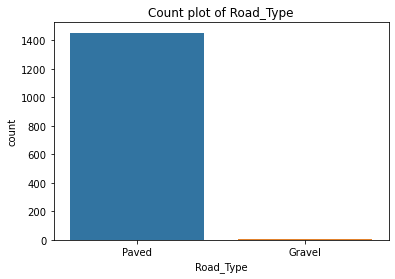

In [81]:
sns.countplot(df.Road_Type)
plt.title('Count plot of Road_Type')

In [82]:
df.groupby('Road_Type')['Sale_Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Road_Type,,,,,,,,
Gravel,6.0,130190.500000,65446.253991,55993.0,88250.0,114250.0,169650.0,228950.0
Paved,1453.0,177548.295251,67188.683804,34900.0,130000.0,163000.0,214000.0,340075.0


In [83]:
df1 = df[df.Road_Type == 'Paved']

df2 = df[df.Road_Type == 'Gravel']

scipy.stats.ttest_ind(df1.Sale_Price, df2.Sale_Price)

Ttest_indResult(statistic=1.7231150711099437, pvalue=0.08507989030496525)

Text(0.5, 1.0, 'Road_Type vs Sale_Price')

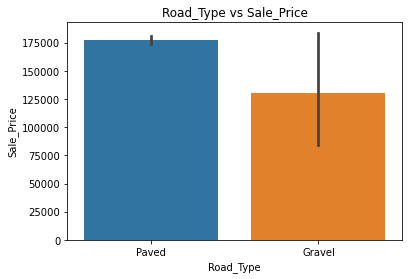

In [84]:
sns.barplot(x=df.Road_Type, y = df.Sale_Price)
plt.title('Road_Type vs Sale_Price')

not good predictor

# 5.Property_Shape

In [85]:
df.Property_Shape.isnull().sum()

0

In [86]:
df.Property_Shape.value_counts()

Reg    924
IR1    484
IR2     41
IR3     10
Name: Property_Shape, dtype: int64

In [87]:
df.Property_Shape.value_counts().sum()

1459

Text(0.5, 1.0, 'Count plot of Property_Shape')

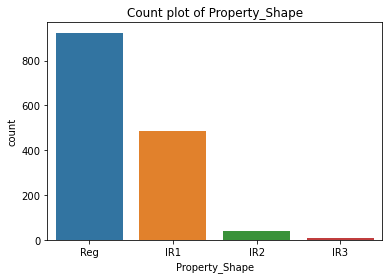

In [88]:
sns.countplot(df.Property_Shape)
plt.title('Count plot of Property_Shape')

In [89]:
mod = ols('Sale_Price ~ Property_Shape', data = df).fit()
print(sm.stats.anova_lm(mod))

                    df        sum_sq       mean_sq          F        PR(>F)
Property_Shape     3.0  5.467115e+11  1.822372e+11  43.878799  3.817793e-27
Residual        1455.0  6.042897e+12  4.153194e+09        NaN           NaN


In [90]:
f_Property_Shape = pairwise_tukeyhsd(df.Sale_Price, df.Property_Shape, alpha = 0.05)
print(f_Property_Shape)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
   IR1    IR2  23113.7285 0.1225    -3846.867   50074.324  False
   IR1    IR3  12250.8017    0.9  -40703.9861  65205.5894  False
   IR1    Reg -37380.0122  0.001  -46680.5294  -28079.495   True
   IR2    IR3 -10862.9268    0.9  -69322.7636  47596.9099  False
   IR2    Reg -60493.7407  0.001  -86948.2787 -34039.2027   True
   IR3    Reg -49630.8139 0.0735 -102329.7552   3068.1275  False
----------------------------------------------------------------


In [91]:
df["Property_Shape"].replace("IR2","IR1",inplace = True)

In [92]:
df.Property_Shape.value_counts()

Reg    924
IR1    525
IR3     10
Name: Property_Shape, dtype: int64

In [93]:
mod= ols("Sale_Price~Property_Shape",data =df).fit()
sm.stats.anova_lm(mod)

,df,sum_sq,mean_sq,F,PR(>F)
Property_Shape,2.0,5.265181e+11,2.632590e+11,63.219434,4.693185e-27
Residual,1456.0,6.063091e+12,4.164211e+09,NaN,NaN


In [94]:
f_Property_Shape = pairwise_tukeyhsd(df.Sale_Price, df.Property_Shape, alpha = 0.05)
print(f_Property_Shape)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
   IR1    IR3  10445.7295 0.8536  -37884.301  58775.7601  False
   IR1    Reg -39185.0843  0.001   -47459.52 -30910.6486   True
   IR3    Reg -49630.8139 0.0415 -97765.4045  -1496.2232   True
---------------------------------------------------------------


In [95]:
df["Property_Shape"].replace("IR3","IR1",inplace = True)

In [96]:
df.Property_Shape.value_counts()

Reg    924
IR1    535
Name: Property_Shape, dtype: int64

In [97]:
df1=df[df.Property_Shape=='Reg']

df2=df[df.Property_Shape=='IR1']

scipy.stats.ttest_ind(df1.Sale_Price,df2.Sale_Price)

Ttest_indResult(statistic=-11.235929281985937, pvalue=3.7599672327296515e-28)

Text(0.5, 1.0, 'Count plot of Property_Shape')

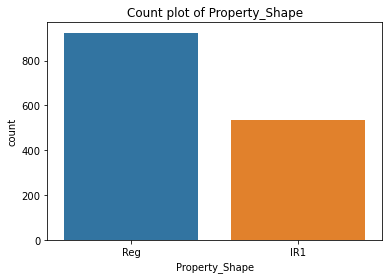

In [98]:
sns.countplot(df.Property_Shape)
plt.title('Count plot of Property_Shape')

Text(0.5, 1.0, 'Cat Plot of Property_Shape vs Sale_Price')

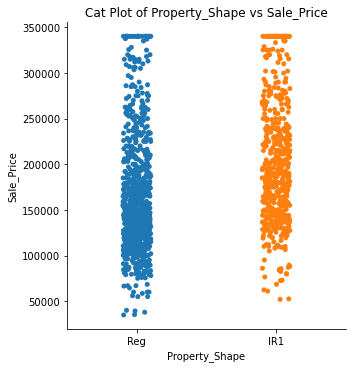

In [99]:
sns.catplot(x = 'Property_Shape', y = 'Sale_Price', data = df)
plt.title('Cat Plot of Property_Shape vs Sale_Price')

Text(0.5, 1.0, 'Box Plot of Property_Shape vs Sale_Price')

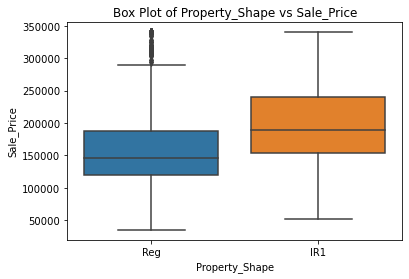

In [100]:
sns.boxplot(x = 'Property_Shape', y = 'Sale_Price', data = df)
plt.title('Box Plot of Property_Shape vs Sale_Price')

Text(0.5, 1.0, 'Property_Shape vs Sale_Price')

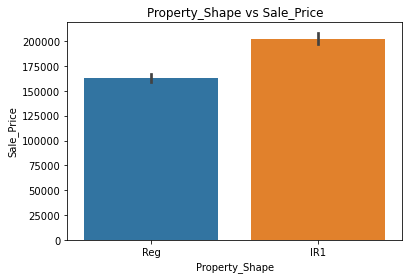

In [101]:
sns.barplot(x=df.Property_Shape, y = df.Sale_Price)
plt.title('Property_Shape vs Sale_Price')

Good Predictor

# 6.Land_Outline

In [102]:
df.Land_Outline.isnull().sum()

0

In [103]:
df.Land_Outline.value_counts()

Lvl    1310
Bnk      63
HLS      50
Low      36
Name: Land_Outline, dtype: int64

In [104]:
df.Land_Outline.value_counts().sum()

1459

Text(0.5, 1.0, 'Count plot of Land_Outline')

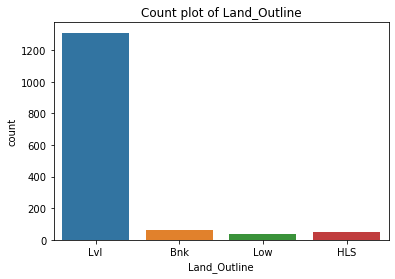

In [105]:
sns.countplot(df.Land_Outline)
plt.title('Count plot of Land_Outline')

In [106]:
mod = ols('Sale_Price ~ Land_Outline', data = df).fit()
print(sm.stats.anova_lm(mod))

                  df        sum_sq       mean_sq          F        PR(>F)
Land_Outline     3.0  1.870987e+11  6.236623e+10  14.173014  4.163942e-09
Residual      1455.0  6.402510e+12  4.400351e+09        NaN           NaN


In [107]:
f_Land_Outline = pairwise_tukeyhsd(df.Sale_Price, df.Land_Outline, alpha = 0.05)
print(f_Land_Outline)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
   Bnk    HLS  77087.2406  0.001  44772.4823  109401.999   True
   Bnk    Low  58338.9762  0.001  22692.7925  93985.1599   True
   Bnk    Lvl  33599.5412  0.001  11593.2775   55605.805   True
   HLS    Low -18748.2644 0.5595 -56041.4894  18544.9605  False
   HLS    Lvl -43487.6994  0.001  -68072.448 -18902.9507   True
   Low    Lvl -24739.4349 0.1218 -53563.3255   4084.4556  False
---------------------------------------------------------------


In [108]:
df["Land_Outline"].replace("HLS","Low",inplace = True)

In [109]:
df.Land_Outline.value_counts()

Lvl    1310
Low      86
Bnk      63
Name: Land_Outline, dtype: int64

In [110]:
mod = ols('Sale_Price ~ Land_Outline', data = df).fit()
print(sm.stats.anova_lm(mod))

                  df        sum_sq       mean_sq          F        PR(>F)
Land_Outline     2.0  1.797418e+11  8.987088e+10  20.414153  1.804157e-09
Residual      1456.0  6.409867e+12  4.402381e+09        NaN           NaN


In [111]:
f_Land_Outline = pairwise_tukeyhsd(df.Sale_Price, df.Land_Outline, alpha = 0.05)
print(f_Land_Outline)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
   Bnk    Low  69239.1299 0.001  43424.2006  95054.0593   True
   Bnk    Lvl  33599.5412 0.001  13521.2544   53677.828   True
   Low    Lvl -35639.5887 0.001 -52967.8562 -18311.3212   True
--------------------------------------------------------------


Text(0.5, 1.0, 'Count plot of Land_Outline')

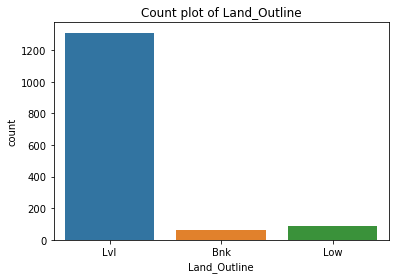

In [112]:
sns.countplot(df.Land_Outline)
plt.title('Count plot of Land_Outline')

Text(0.5, 1.0, 'Box Plot of Land_Outline vs Sale_Price')

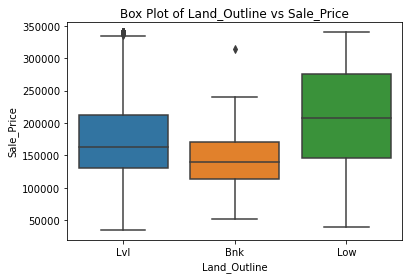

In [113]:
sns.boxplot(x = 'Land_Outline', y = 'Sale_Price', data = df)
plt.title('Box Plot of Land_Outline vs Sale_Price')

Text(0.5, 1.0, 'Land_Outline vs Sale_Price')

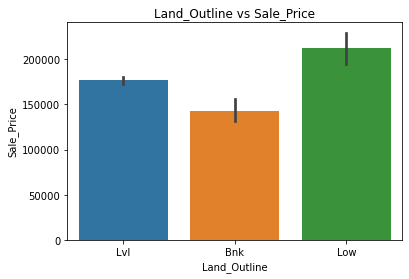

In [114]:
sns.barplot(x=df.Land_Outline, y = df.Sale_Price)
plt.title('Land_Outline vs Sale_Price')

good predictor

# 7.Utility Type

In [115]:
df.Utility_Type.isnull().sum()

0

In [116]:
df.Utility_Type.value_counts()

AllPub    1458
NoSeWa       1
Name: Utility_Type, dtype: int64

In [117]:
df.Utility_Type.value_counts().sum()

1459

Text(0.5, 1.0, 'Count plot of Utility_Type')

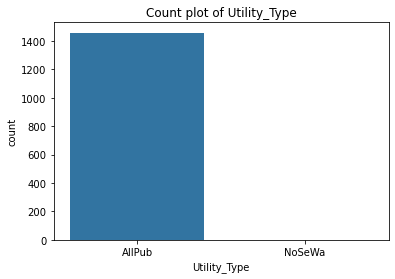

In [118]:
sns.countplot(df.Utility_Type)
plt.title('Count plot of Utility_Type')

In [119]:
df.groupby("Utility_Type")["Sale_Price"].describe()

,count,mean,std,min,25%,50%,75%,max
Utility_Type,,,,,,,,
AllPub,1458.0,177380.875171,67243.089555,34900.0,129925.0,163000.0,214000.0,340075.0
NoSeWa,1.0,137500.000000,NaN,137500.0,137500.0,137500.0,137500.0,137500.0


In [120]:
df1=df[df.Utility_Type=='AllPub']

df2=df[df.Utility_Type=='NoSeWa']

scipy.stats.ttest_ind(df1.Sale_Price,df2.Sale_Price)

Ttest_indResult(statistic=nan, pvalue=nan)

Text(0.5, 1.0, 'Utility_Type vs Sale_Price')

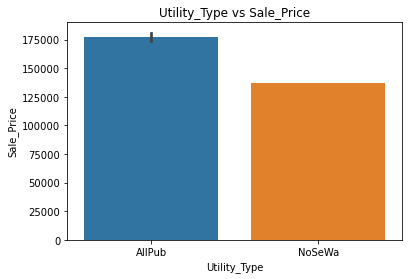

In [121]:
sns.barplot(x=df.Utility_Type, y = df.Sale_Price)
plt.title('Utility_Type vs Sale_Price')

not good predictor

# 8.Property_Slope

In [122]:
df.Property_Slope.isnull().sum()

0

In [123]:
df.Property_Slope.value_counts()

GS    1381
MS      65
SS      13
Name: Property_Slope, dtype: int64

In [124]:
df.Property_Slope.value_counts().sum()

1459

Text(0.5, 1.0, 'Count plot of Property_Slope')

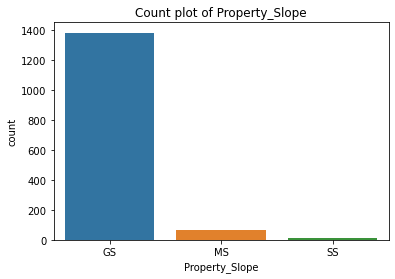

In [125]:
sns.countplot(df.Property_Slope)
plt.title('Count plot of Property_Slope')

In [126]:
df.groupby("Property_Slope")["Sale_Price"].describe()

,count,mean,std,min,25%,50%,75%,max
Property_Slope,,,,,,,,
GS,1381.0,176436.923968,66352.588442,34900.0,129900.0,162000.0,212000.0,340075.0
MS,65.0,191960.292308,80207.453552,39300.0,130000.0,186700.0,259500.0,340075.0
SS,13.0,201692.692308,81380.290832,61000.0,143000.0,185000.0,260000.0,340075.0


In [127]:
mod = ols('Sale_Price ~ Property_Slope', data = df).fit()
print(sm.stats.anova_lm(mod))

                    df        sum_sq       mean_sq         F    PR(>F)
Property_Slope     2.0  2.272964e+10  1.136482e+10  2.519793  0.080827
Residual        1456.0  6.566879e+12  4.510219e+09       NaN       NaN


Text(0.5, 1.0, 'Property_Slope vs Sale_Price')

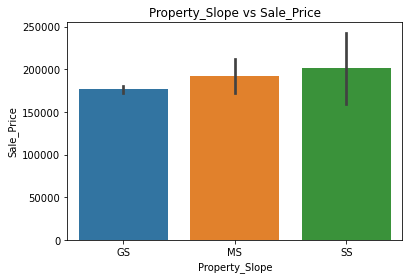

In [128]:
sns.barplot(x=df.Property_Slope, y = df.Sale_Price)
plt.title('Property_Slope vs Sale_Price')

not good predictor

# 9.House_Type

In [129]:
df.House_Type.isnull().sum()

0

In [130]:
df.House_Type.value_counts()

1Fam      1219
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: House_Type, dtype: int64

In [131]:
df.House_Type.value_counts().sum()

1459

Text(0.5, 1.0, 'Count plot of House_Type')

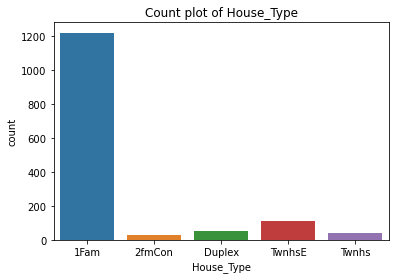

In [132]:
sns.countplot(df.House_Type)
plt.title('Count plot of House_Type')

In [133]:
df.groupby("House_Type")["Sale_Price"].describe()

,count,mean,std,min,25%,50%,75%,max
House_Type,,,,,,,,
1Fam,1219.0,181563.050861,68910.898059,34900.0,131450.0,167900.0,222000.0,340075.0
2fmCon,31.0,128432.258065,35458.545158,55000.0,106875.0,127500.0,142500.0,228950.0
Duplex,52.0,133541.076923,27833.249197,82000.0,118375.0,135980.0,145000.0,206300.0
Twnhs,43.0,135911.627907,41013.222080,75000.0,95750.0,137500.0,168750.0,230000.0
TwnhsE,114.0,181260.710526,58491.623409,75500.0,143187.5,172200.0,207375.0,340075.0


In [134]:
mod = ols('Sale_Price ~ House_Type', data = df).fit()
print(sm.stats.anova_lm(mod))

                df        sum_sq       mean_sq          F        PR(>F)
House_Type     4.0  2.711983e+11  6.779957e+10  15.602115  1.664127e-12
Residual    1454.0  6.318411e+12  4.345537e+09        NaN           NaN


In [135]:
f_House_Type = pairwise_tukeyhsd(df.Sale_Price, df.House_Type, alpha = 0.05)
print(f_House_Type)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
  1Fam 2fmCon -53130.7928  0.001 -85875.9177 -20385.6679   True
  1Fam Duplex -48021.9739  0.001 -73516.3035 -22527.6444   True
  1Fam  Twnhs  -45651.423  0.001 -73587.6622 -17715.1837   True
  1Fam TwnhsE   -302.3403    0.9  -17935.703  17331.0224  False
2fmCon Duplex   5108.8189    0.9 -35744.8319  45962.4696  False
2fmCon  Twnhs   7479.3698    0.9 -34941.0663   49899.806  False
2fmCon TwnhsE  52828.4525  0.001  16359.3502  89297.5547   True
Duplex  Twnhs    2370.551    0.9 -34740.2431  39481.3451  False
Duplex TwnhsE  47719.6336  0.001  17591.3569  77847.9103   True
 Twnhs TwnhsE  45349.0826 0.0012  13128.1938  77569.9715   True
---------------------------------------------------------------


In [136]:
df['House_Type'].replace('1Fam', 'TwnhsE', inplace = True)
df['House_Type'].replace('2fmCon', 'Duplex', inplace = True)
df['House_Type'].replace('Twnhs', 'Duplex', inplace = True)

In [137]:
df.House_Type.value_counts().sum()

1459

In [138]:
df.House_Type.value_counts()

TwnhsE    1333
Duplex     126
Name: House_Type, dtype: int64

In [139]:
df1=df[df.House_Type=='TwnhsE']

df2=df[df.House_Type=='Duplex']

scipy.stats.ttest_ind(df1.Sale_Price,df2.Sale_Price)

Ttest_indResult(statistic=7.892297476222942, pvalue=5.7868033118821735e-15)

Text(0.5, 1.0, 'Count plot of House_Type')

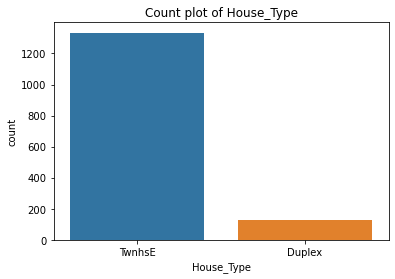

In [140]:
sns.countplot(df.House_Type)
plt.title('Count plot of House_Type')

Text(0.5, 1.0, 'Box Plot of House_Type vs Sale_Price')

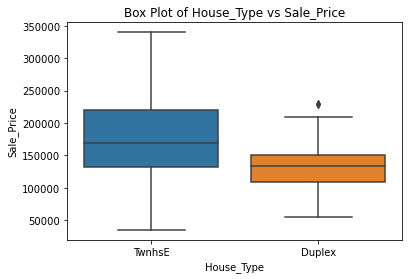

In [141]:
sns.boxplot(x = 'House_Type', y = 'Sale_Price', data = df)
plt.title('Box Plot of House_Type vs Sale_Price')

Text(0.5, 1.0, 'House_Type vs Sale_Price')

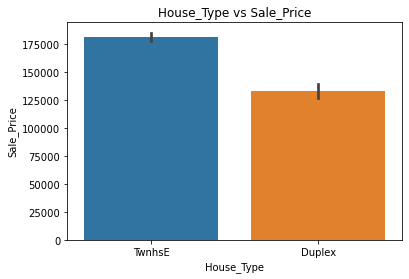

In [142]:
sns.barplot(x=df.House_Type, y = df.Sale_Price)
plt.title('House_Type vs Sale_Price')

good predictor

# 10.Remodel Year

In [143]:
df.Remodel_Year.isnull().sum()

0

In [144]:
df.Remodel_Year.value_counts()

1950    178
2006     97
2007     76
2005     73
2004     62
       ... 
2010      6
1986      5
1952      5
1983      5
1951      4
Name: Remodel_Year, Length: 61, dtype: int64

In [145]:
df.Remodel_Year.value_counts().sum()

1459

Text(0.5, 1.0, 'Histogram of Remodel_Year')

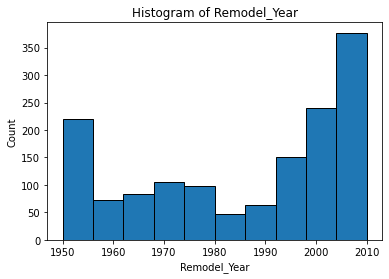

In [146]:
plt.hist(df.Remodel_Year,edgecolor = "black")
plt.xlabel("Remodel_Year")
plt.ylabel("Count")
plt.title("Histogram of Remodel_Year")

Text(0.5, 1.0, 'Normality of Remodel_Year')

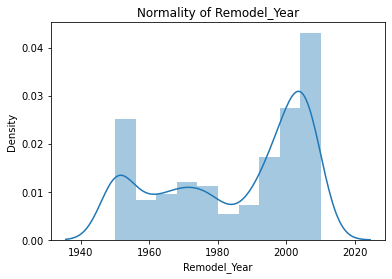

In [147]:
sns.distplot(df.Remodel_Year)
plt.title('Normality of Remodel_Year')

Text(0.5, 1.0, 'Box plot of Remodel_Year')

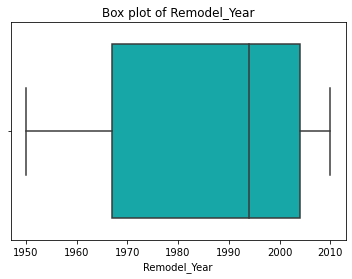

In [148]:
sns.boxplot(x = df.Remodel_Year, data =df, color = 'c')
plt.title('Box plot of Remodel_Year')

In [149]:
np.corrcoef(df.Remodel_Year, df.Sale_Price)

array([[1.        , 0.55197067],
       [0.55197067, 1.        ]])

Text(0.5, 1.0, 'Scatter plot of Remodel_Year vs Sale_Price')

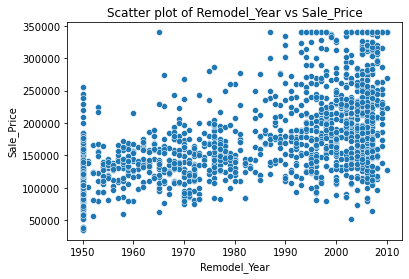

In [150]:
sns.scatterplot(x = df['Remodel_Year'], y = df.Sale_Price, data = df)
plt.xlabel('Remodel_Year')
plt.ylabel('Sale_Price')
plt.title('Scatter plot of Remodel_Year vs Sale_Price')

not good predictor

# 11.Exterior_Material

In [151]:
df.Exterior_Material.isnull().sum()

0

In [152]:
df.Exterior_Material.value_counts()

TA    906
Gd    487
Ex     52
Fa     14
Name: Exterior_Material, dtype: int64

In [153]:
df.Exterior_Material.value_counts().sum()

1459

Text(0.5, 1.0, 'Count plot of Exterior_Material')

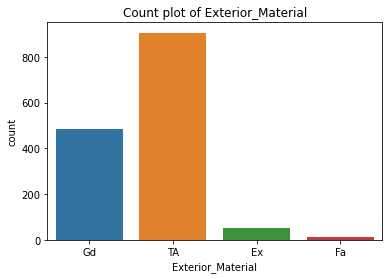

In [154]:
sns.countplot(df.Exterior_Material)
plt.title('Count plot of Exterior_Material')

In [155]:
mod = ols('Sale_Price ~ Exterior_Material', data=df).fit()
print(sm.stats.anova_lm(mod))

                       df        sum_sq       mean_sq          F  \
Exterior_Material     3.0  3.237586e+12  1.079195e+12  468.44242   
Residual           1455.0  3.352022e+12  2.303795e+09        NaN   

                          PR(>F)  
Exterior_Material  5.888056e-213  
Residual                     NaN  


In [156]:
f_Exterior_Material = pairwise_tukeyhsd(df.Sale_Price, df.Exterior_Material)
print(f_Exterior_Material)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj    lower        upper     reject
-----------------------------------------------------------------
    Ex     Fa -221841.4973 0.001 -259012.2675  -184670.727   True
    Ex     Gd  -82434.0072 0.001 -100444.4136  -64423.6008   True
    Ex     TA -165592.9511 0.001 -183196.9878 -147988.9143   True
    Fa     Gd    139407.49 0.001  105942.8894  172872.0907   True
    Fa     TA   56248.5462 0.001   23000.8866   89496.2058   True
    Gd     TA  -83158.9438 0.001  -90095.4737   -76222.414   True
-----------------------------------------------------------------


Text(0.5, 1.0, 'Box plot of Exterior_Material vs Sale_Price')

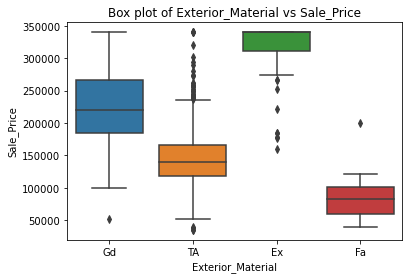

In [157]:
sns.boxplot('Exterior_Material', 'Sale_Price', data=df)
plt.title('Box plot of Exterior_Material vs Sale_Price')

Text(0.5, 1.0, 'Exterior_Material vs Sale_Price')

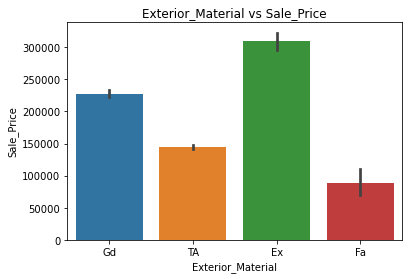

In [158]:
sns.barplot(x=df.Exterior_Material, y = df.Sale_Price)
plt.title('Exterior_Material vs Sale_Price')

good predictor

# 12.Exterior_Condition

In [159]:
df.Exterior_Condition.isnull().sum()

0

In [160]:
df.Exterior_Condition.value_counts()

TA    1281
Gd     146
Fa      28
Ex       3
Po       1
Name: Exterior_Condition, dtype: int64

In [161]:
df.Exterior_Condition.value_counts().sum()

1459

Text(0.5, 1.0, 'Count plot of Exterior_Condition')

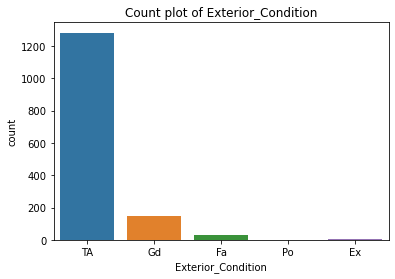

In [162]:
sns.countplot(df.Exterior_Condition)
plt.title('Count plot of Exterior_Condition')

In [163]:
mod = ols('Sale_Price ~ Exterior_Condition', data=df).fit()
print(sm.stats.anova_lm(mod))

                        df        sum_sq       mean_sq          F  \
Exterior_Condition     4.0  1.997366e+11  4.993416e+10  11.362397   
Residual            1454.0  6.389872e+12  4.394685e+09        NaN   

                          PR(>F)  
Exterior_Condition  4.408199e-09  
Residual                     NaN  


In [164]:
f_Exterior_Condition = pairwise_tukeyhsd(df.Sale_Price, df.Exterior_Condition)
print(f_Exterior_Condition)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj     lower        upper    reject
-----------------------------------------------------------------
    Ex     Fa  -98738.1905 0.1025 -208729.3329  11252.9519  False
    Ex     Gd  -35659.7374 0.8819 -141261.8455  69942.3706  False
    Ex     Po -124833.3333 0.4786  -333900.521  84233.8543  False
    Ex     TA  -20991.9539    0.9 -125647.8809   83663.973  False
    Fa     Gd    63078.453  0.001   25724.5756 100432.3305   True
    Fa     Po  -26095.1429    0.9 -210357.4447  158167.159  False
    Fa     TA   77746.2365  0.001    43157.655  112334.818   True
    Gd     Po  -89173.5959 0.6446 -270850.0933  92502.9015  False
    Gd     TA   14667.7835 0.0842    -1147.519   30483.086  False
    Po     TA  103841.3794 0.5169  -77286.7728 284969.5316  False
-----------------------------------------------------------------


In [165]:
df["Exterior_Condition"].replace('Ex', 'TA',inplace = True)
df["Exterior_Condition"].replace('Gd', 'TA',inplace = True)
df["Exterior_Condition"].replace('Po', 'Fa',inplace = True)

In [166]:
df.Exterior_Condition.value_counts()

TA    1430
Fa      29
Name: Exterior_Condition, dtype: int64

Text(0.5, 1.0, 'Count plot of Exterior_Condition')

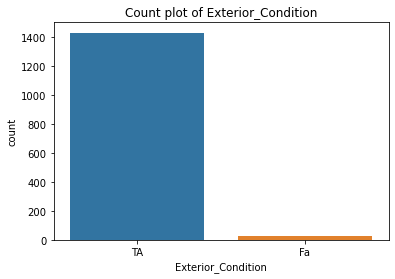

In [167]:
sns.countplot(df.Exterior_Condition)
plt.title('Count plot of Exterior_Condition')

Text(0.5, 1.0, 'Box plot of Exterior_Condition vs Sale_Price')

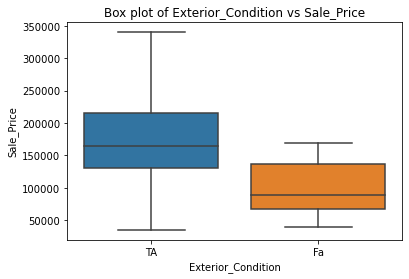

In [168]:
sns.boxplot('Exterior_Condition', 'Sale_Price', data=df)
plt.title('Box plot of Exterior_Condition vs Sale_Price')

Text(0.5, 1.0, 'Exterior_Condition vs Sale_Price')

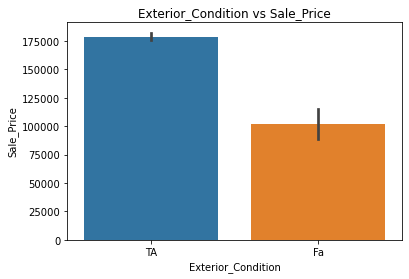

In [169]:
sns.barplot(x=df.Exterior_Condition, y = df.Sale_Price)
plt.title('Exterior_Condition vs Sale_Price')

good predictor

# 13.Heating_Quality

In [170]:
df.Heating_Quality.isnull().sum()

0

In [171]:
df.Heating_Quality.value_counts()

Ex    741
TA    428
Gd    240
Fa     49
Po      1
Name: Heating_Quality, dtype: int64

In [172]:
df.Heating_Quality.value_counts().sum()

1459

Text(0.5, 1.0, 'Count plot of Heating_Quality')

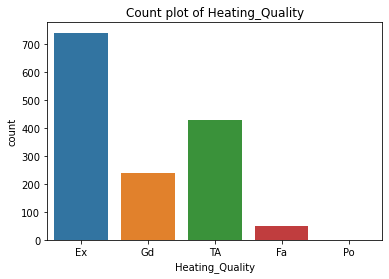

In [173]:
sns.countplot(df.Heating_Quality)
plt.title('Count plot of Heating_Quality')

In [174]:
mod = ols('Sale_Price ~ Heating_Quality', data=df).fit()
print(sm.stats.anova_lm(mod))

                     df        sum_sq       mean_sq           F        PR(>F)
Heating_Quality     4.0  1.479259e+12  3.698148e+11  105.219944  8.871890e-79
Residual         1454.0  5.110350e+12  3.514683e+09         NaN           NaN


In [175]:
Heating_Quality = pairwise_tukeyhsd(df.Sale_Price, df.Heating_Quality)
print(Heating_Quality)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj     lower        upper    reject
-----------------------------------------------------------------
    Ex     Fa   -84139.467  0.001 -108023.1959 -60255.7381   True
    Ex     Gd  -51597.6526  0.001  -63623.4951 -39571.8102   True
    Ex     Po -121058.9568  0.247 -283086.4005  40968.4869  False
    Ex     TA   -65822.132  0.001  -75652.5504 -55991.7137   True
    Fa     Gd   32541.8144 0.0043    7158.9288  57924.6999   True
    Fa     Po  -36919.4898    0.9 -200481.5957 126642.6161  False
    Fa     TA    18317.335 0.2433   -6102.0655  42736.7354  False
    Gd     Po  -69461.3042 0.7418 -231716.5071  92793.8988  False
    Gd     TA  -14224.4794 0.0248  -27281.8719  -1167.0869   True
    Po     TA   55236.8248 0.8771 -106870.4456 217344.0952  False
-----------------------------------------------------------------


In [176]:
df["Heating_Quality"].replace('ex', 'po',inplace = True)

In [177]:
df.Heating_Quality.value_counts()

Ex    741
TA    428
Gd    240
Fa     49
Po      1
Name: Heating_Quality, dtype: int64

In [178]:
mod = ols('Sale_Price ~ Heating_Quality', data=df).fit()
print(sm.stats.anova_lm(mod))

                     df        sum_sq       mean_sq           F        PR(>F)
Heating_Quality     4.0  1.479259e+12  3.698148e+11  105.219944  8.871890e-79
Residual         1454.0  5.110350e+12  3.514683e+09         NaN           NaN


In [179]:
Heating_Quality = pairwise_tukeyhsd(df.Sale_Price, df.Heating_Quality)
print(Heating_Quality)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj     lower        upper    reject
-----------------------------------------------------------------
    Ex     Fa   -84139.467  0.001 -108023.1959 -60255.7381   True
    Ex     Gd  -51597.6526  0.001  -63623.4951 -39571.8102   True
    Ex     Po -121058.9568  0.247 -283086.4005  40968.4869  False
    Ex     TA   -65822.132  0.001  -75652.5504 -55991.7137   True
    Fa     Gd   32541.8144 0.0043    7158.9288  57924.6999   True
    Fa     Po  -36919.4898    0.9 -200481.5957 126642.6161  False
    Fa     TA    18317.335 0.2433   -6102.0655  42736.7354  False
    Gd     Po  -69461.3042 0.7418 -231716.5071  92793.8988  False
    Gd     TA  -14224.4794 0.0248  -27281.8719  -1167.0869   True
    Po     TA   55236.8248 0.8771 -106870.4456 217344.0952  False
-----------------------------------------------------------------


In [180]:
df["Heating_Quality"].replace('Fa', 'TA',inplace = True)

In [181]:
df.Heating_Quality.value_counts()

Ex    741
TA    477
Gd    240
Po      1
Name: Heating_Quality, dtype: int64

In [182]:
mod = ols('Sale_Price ~ Heating_Quality', data=df).fit()
print(sm.stats.anova_lm(mod))

                     df        sum_sq       mean_sq           F        PR(>F)
Heating_Quality     3.0  1.464507e+12  4.881691e+11  138.589656  5.574604e-79
Residual         1455.0  5.125101e+12  3.522407e+09         NaN           NaN


In [183]:
Heating_Quality = pairwise_tukeyhsd(df.Sale_Price, df.Heating_Quality)
print(Heating_Quality)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj     lower        upper    reject
-----------------------------------------------------------------
    Ex     Gd  -51597.6526  0.001  -62935.0364 -40260.2689   True
    Ex     Po -121058.9568 0.1746 -273810.6085  31692.6949  False
    Ex     TA   -67703.787  0.001  -76664.6207 -58742.9533   True
    Gd     Po  -69461.3042 0.6297 -222427.6763   83505.068  False
    Gd     TA  -16106.1344 0.0035  -28186.7157   -4025.553   True
    Po     TA   53355.1698 0.7811  -99453.4401 206163.7797  False
-----------------------------------------------------------------


In [184]:
df["Heating_Quality"].replace('Po', 'Gd',inplace = True)

In [185]:
mod = ols('Sale_Price ~ Heating_Quality', data=df).fit()
print(sm.stats.anova_lm(mod))

                     df        sum_sq       mean_sq           F        PR(>F)
Heating_Quality     2.0  1.459702e+12  7.298512e+11  207.150643  6.758592e-80
Residual         1456.0  5.129906e+12  3.523287e+09         NaN           NaN


In [186]:
Heating_Quality = pairwise_tukeyhsd(df.Sale_Price, df.Heating_Quality)
print(Heating_Quality)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
    Ex     Gd -51885.8738  0.001 -62212.6707  -41559.077   True
    Ex     TA  -67703.787  0.001 -75878.6948 -59528.8792   True
    Gd     TA -15817.9132 0.0022 -26823.7236  -4812.1028   True
---------------------------------------------------------------


In [187]:
df.Heating_Quality.value_counts()

Ex    741
TA    477
Gd    241
Name: Heating_Quality, dtype: int64

Text(0.5, 1.0, 'Count plot of Heating_Quality')

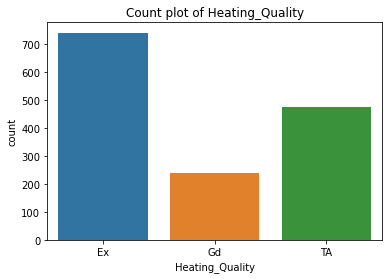

In [188]:
sns.countplot(df.Heating_Quality)
plt.title('Count plot of Heating_Quality')

Text(0.5, 1.0, 'Box Plot of Heating_Quality vs Sale_Price')

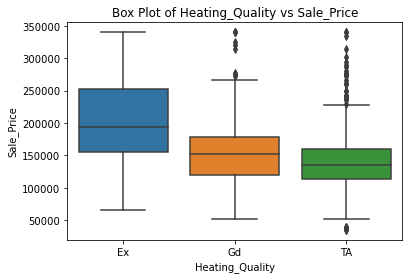

In [189]:
sns.boxplot('Heating_Quality', 'Sale_Price', data=df)
plt.title('Box Plot of Heating_Quality vs Sale_Price')

Text(0.5, 1.0, 'Heating_Quality vs Sale_Price')

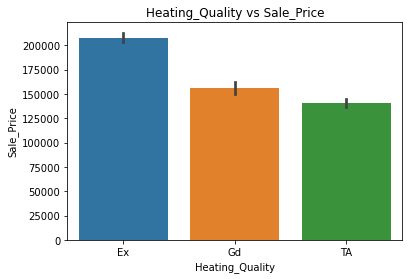

In [190]:
sns.barplot(x=df.Heating_Quality, y = df.Sale_Price)
plt.title('Heating_Quality vs Sale_Price')

good predictor

# 14.Air Conditioning

In [191]:
df.Air_Conditioning.isnull().sum()

0

In [192]:
df.Air_Conditioning.value_counts()

Y    1364
N      95
Name: Air_Conditioning, dtype: int64

Text(0.5, 1.0, 'Count plot of Air_Conditioning')

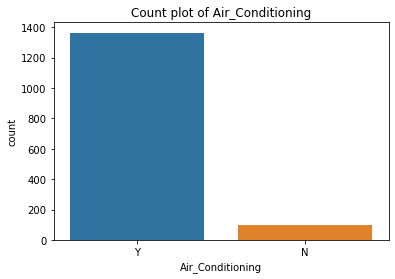

In [193]:
sns.countplot(df.Air_Conditioning)
plt.title('Count plot of Air_Conditioning')

In [194]:
df.groupby("Air_Conditioning")["Sale_Price"].describe()

,count,mean,std,min,25%,50%,75%,max
Air_Conditioning,,,,,,,,
N,95.0,105264.073684,40671.273961,34900.0,82000.0,98000.0,128500.0,265979.0
Y,1364.0,182374.434751,65826.358507,52000.0,134725.0,168250.0,219282.5,340075.0


In [195]:
df1=df[df.Air_Conditioning=='Y']
df2=df[df.Air_Conditioning=='N']

scipy.stats.ttest_ind(df1.Sale_Price,df2.Sale_Price)

Ttest_indResult(statistic=11.266606728479273, pvalue=2.7301996687773654e-28)

Text(0.5, 1.0, 'Box Plot of Air_Conditioning vs Sale_Price')

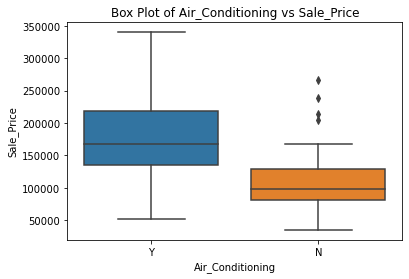

In [196]:
sns.boxplot('Air_Conditioning', 'Sale_Price', data=df)
plt.title('Box Plot of Air_Conditioning vs Sale_Price')

Text(0.5, 1.0, 'Air_Conditioning vs Sale_Price')

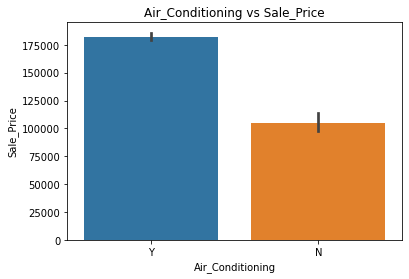

In [197]:
sns.barplot(x=df.Air_Conditioning, y = df.Sale_Price)
plt.title('Air_Conditioning vs Sale_Price')

good predictor

# 15.Kitchen_Quality

In [198]:
df.Kitchen_Quality.isnull().sum()

0

In [199]:
df.Kitchen_Quality.value_counts()

TA    734
Gd    586
Ex    100
Fa     39
Name: Kitchen_Quality, dtype: int64

In [200]:
df.Kitchen_Quality.value_counts().sum()

1459

Text(0.5, 1.0, 'Count plot of Kitchen_Quality')

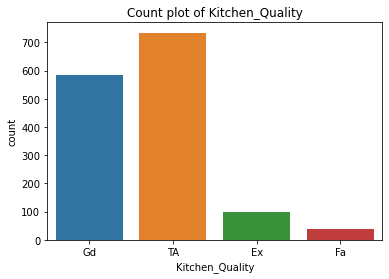

In [201]:
sns.countplot(df.Kitchen_Quality)
plt.title('Count plot of Kitchen_Quality')

In [202]:
mod = ols('Sale_Price ~ Kitchen_Quality', data=df).fit()
print(sm.stats.anova_lm(mod))

                     df        sum_sq       mean_sq           F         PR(>F)
Kitchen_Quality     3.0  3.099321e+12  1.033107e+12  430.672327  3.398865e-200
Residual         1455.0  3.490288e+12  2.398823e+09         NaN            NaN


In [203]:
f_Kitchen_Quality = pairwise_tukeyhsd(df.Sale_Price, df.Kitchen_Quality)
print(f_Kitchen_Quality)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj    lower        upper     reject
-----------------------------------------------------------------
    Ex     Fa -183167.1249 0.001 -206949.0808  -159385.169   True
    Ex     Gd  -78668.2617 0.001  -92297.9437  -65038.5798   True
    Ex     TA -148853.5889 0.001 -162281.4694 -135425.7083   True
    Fa     Gd  104498.8631 0.001   83666.8438  125330.8825   True
    Fa     TA    34313.536 0.001   13612.9859   55014.0861   True
    Gd     TA  -70185.3271 0.001  -77163.8354  -63206.8188   True
-----------------------------------------------------------------


Text(0.5, 1.0, 'Cat Plot of Kitchen_Quality vs Sale_Price')

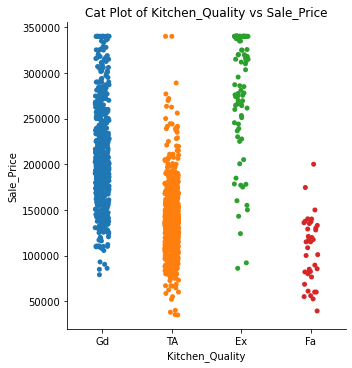

In [204]:
sns.catplot('Kitchen_Quality', 'Sale_Price', data=df)
plt.title('Cat Plot of Kitchen_Quality vs Sale_Price')

Text(0.5, 1.0, 'Box Plot of Kitchen_Quality vs Sale_Price')

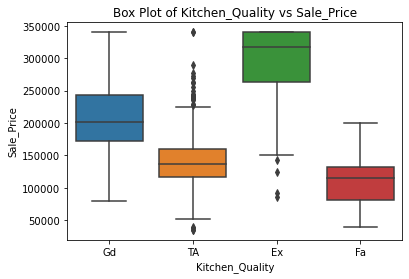

In [205]:
sns.boxplot('Kitchen_Quality', 'Sale_Price', data=df)
plt.title('Box Plot of Kitchen_Quality vs Sale_Price')

Text(0.5, 1.0, 'Kitchen_Quality vs Sale_Price')

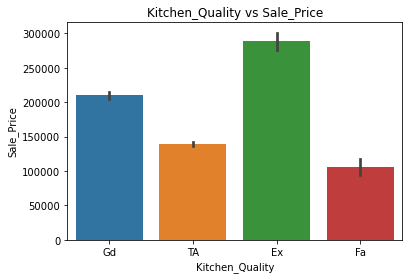

In [206]:
sns.barplot(x=df.Kitchen_Quality, y = df.Sale_Price)
plt.title('Kitchen_Quality vs Sale_Price')

good predictor

# 16.BsmtFinSF1

In [207]:
df.BsmtFinSF1.isnull().sum()

0

In [208]:
df.BsmtFinSF1.describe()

count    1459.000000
mean      443.374914
std       456.142186
min         0.000000
25%         0.000000
50%       383.000000
75%       712.000000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

In [209]:
df.BsmtFinSF1.value_counts()

0       467
24       12
16        9
686       5
662       5
       ... 
1338      1
1324      1
1460      1
328       1
49        1
Name: BsmtFinSF1, Length: 636, dtype: int64

In [210]:
df.BsmtFinSF1.value_counts().sum()

1459

Text(0.5, 1.0, 'Histogram of BsmtFinSF1')

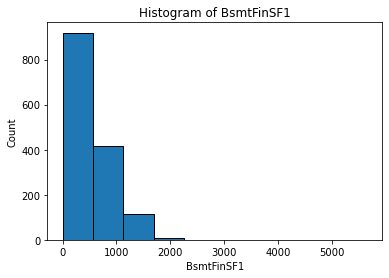

In [211]:
plt.hist(df.BsmtFinSF1,edgecolor = "black")
plt.xlabel("BsmtFinSF1")
plt.ylabel("Count")
plt.title("Histogram of BsmtFinSF1")

Text(0.5, 1.0, 'Normality of BsmtFinSF1')

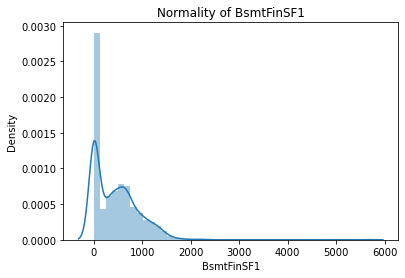

In [212]:
sns.distplot(df.BsmtFinSF1)
plt.title('Normality of BsmtFinSF1')

Text(0.5, 1.0, 'BoxPlot Of BsmtFinSF1')

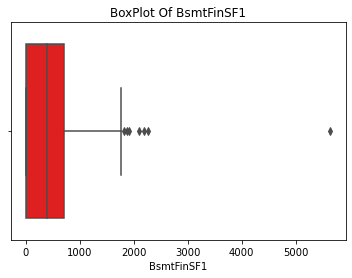

In [213]:
sns.boxplot(df.BsmtFinSF1, color = 'red')
plt.title('BoxPlot Of BsmtFinSF1')

In [214]:
IQR = df.BsmtFinSF1.quantile(0.75) - df.BsmtFinSF1.quantile(0.25)
IQR

712.0

In [215]:
upper_limit = df.BsmtFinSF1.quantile(0.75) + (1.5*IQR)
upper_limit

1780.0

In [216]:
lower_limit = df.BsmtFinSF1.quantile(0.25) - (1.5*IQR)
lower_limit

-1068.0

In [217]:
df.BsmtFinSF1 = np.where(df.BsmtFinSF1 > upper_limit, upper_limit, df.BsmtFinSF1)

Text(0.5, 1.0, 'BoxPlot Of BsmtFinSF1')

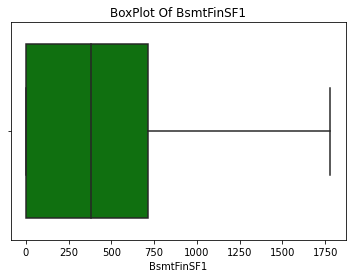

In [218]:
sns.boxplot(df.BsmtFinSF1, color = 'g')
plt.title('BoxPlot Of BsmtFinSF1')

In [219]:
np.corrcoef(df.BsmtFinSF1, df.Sale_Price)

array([[1.        , 0.38800167],
       [0.38800167, 1.        ]])

Text(0.5, 1.0, 'Histogram of BsmtFinSF1')

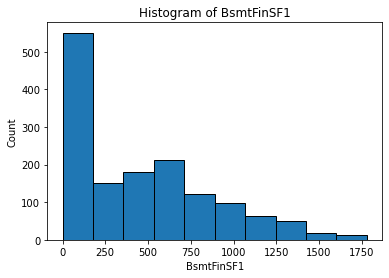

In [220]:
plt.hist(df.BsmtFinSF1,edgecolor = "black")
plt.xlabel("BsmtFinSF1")
plt.ylabel("Count")
plt.title("Histogram of BsmtFinSF1")

not good predictor

# 17.BsmtFinSF2

In [221]:
df.BsmtFinSF2.isnull().sum()

0

In [222]:
df.BsmtFinSF2.describe()

count    1459.000000
mean       46.382454
std       161.248500
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64

In [223]:
df.BsmtFinSF2.value_counts()

0       1293
180        5
374        3
469        2
64         2
        ... 
165        1
1120       1
311        1
210        1
1029       1
Name: BsmtFinSF2, Length: 144, dtype: int64

In [224]:
df.BsmtFinSF2.value_counts().sum()

1459

Text(0.5, 1.0, 'Histogram of BsmtFinSF2')

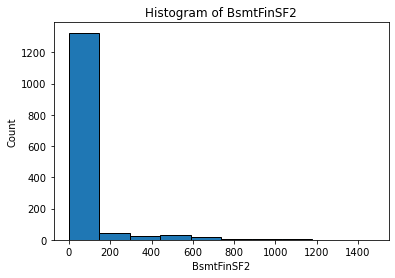

In [225]:
plt.hist(df.BsmtFinSF2,edgecolor = "black")
plt.xlabel("BsmtFinSF2")
plt.ylabel("Count")
plt.title("Histogram of BsmtFinSF2")

Text(0.5, 1.0, 'Normality of BsmtFinSF1')

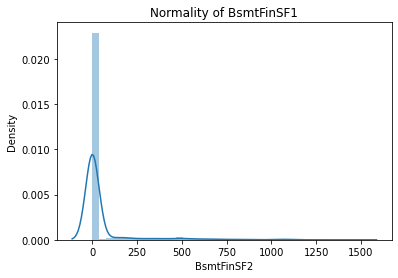

In [226]:
sns.distplot(df.BsmtFinSF2)
plt.title('Normality of BsmtFinSF1')

Text(0.5, 1.0, 'BoxPlot Of BsmtFinSF1')

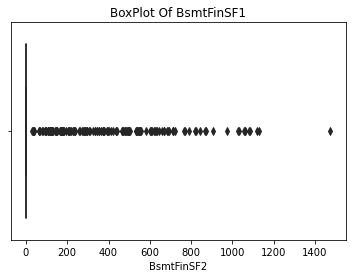

In [227]:
sns.boxplot(df.BsmtFinSF2, color = 'g')
plt.title('BoxPlot Of BsmtFinSF1')

In [228]:
np.corrcoef(df.BsmtFinSF2, df.Sale_Price)

array([[ 1.        , -0.00741868],
       [-0.00741868,  1.        ]])

not good predictor

# 18.Total_Basement_Area

In [229]:
df.Total_Basement_Area.isnull().sum()

0

In [230]:
df.Total_Basement_Area.describe()

count    1459.000000
mean     1057.293352
std       438.824912
min         0.000000
25%       795.500000
50%       991.000000
75%      1298.500000
max      6110.000000
Name: Total_Basement_Area, dtype: float64

In [231]:
df.Total_Basement_Area.value_counts()

0       37
864     35
672     17
912     15
1040    14
        ..
1838     1
1581     1
707      1
611      1
1542     1
Name: Total_Basement_Area, Length: 721, dtype: int64

In [232]:
df.Total_Basement_Area.value_counts().sum()

1459

Text(0.5, 1.0, 'Histogram of Total_Basement_Area')

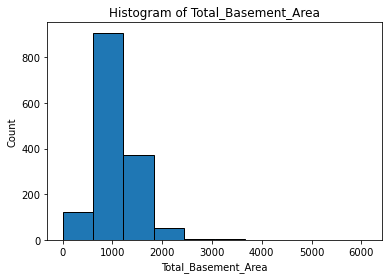

In [233]:
plt.hist(df.Total_Basement_Area,edgecolor = "black")
plt.xlabel("Total_Basement_Area")
plt.ylabel("Count")
plt.title("Histogram of Total_Basement_Area")

Text(0.5, 1.0, 'Normality of Total_Basement_Area')

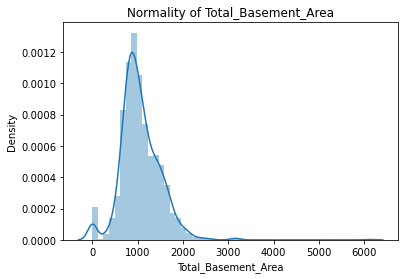

In [234]:
sns.distplot(df.Total_Basement_Area)
plt.title('Normality of Total_Basement_Area')

Text(0.5, 1.0, 'BoxPlot Of Total_Basement_Area')

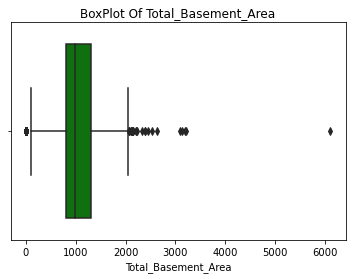

In [235]:
sns.boxplot(df.Total_Basement_Area, color = 'g')
plt.title('BoxPlot Of Total_Basement_Area')

In [236]:
IQR = df.Total_Basement_Area.quantile(0.75) - df.Total_Basement_Area.quantile(0.25)
IQR

503.0

In [237]:
upper_limit = df.Total_Basement_Area.quantile(0.75) + (1.5*IQR)
upper_limit

2053.0

In [238]:
lower_limit = df.Total_Basement_Area.quantile(0.25) - (1.5*IQR)
lower_limit

41.0

In [239]:
df.Total_Basement_Area = np.where(df.Total_Basement_Area > upper_limit, upper_limit, df.Total_Basement_Area)

In [240]:
df.Total_Basement_Area = np.where(df.Total_Basement_Area < lower_limit, lower_limit, df.Total_Basement_Area)

Text(0.5, 1.0, 'BoxPlot Of Total_Basement_Area')

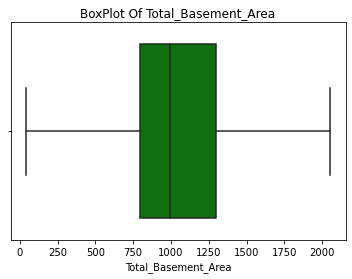

In [241]:
sns.boxplot(df.Total_Basement_Area, color = 'g')
plt.title('BoxPlot Of Total_Basement_Area')

In [242]:
np.corrcoef(df.Total_Basement_Area, df.Sale_Price)

array([[1.        , 0.64548607],
       [0.64548607, 1.        ]])

Text(0.5, 1.0, 'Scatter plot of Total_Basement_Area vs Sale_Price')

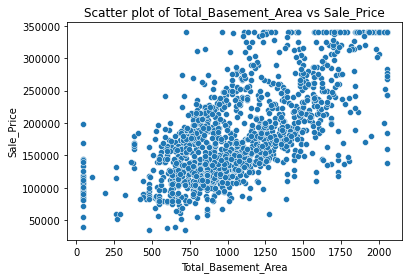

In [243]:
sns.scatterplot(x = df['Total_Basement_Area'], y = df.Sale_Price, data = df )
plt.xlabel('Total_Basement_Area')
plt.ylabel('Sale_Price')
plt.title('Scatter plot of Total_Basement_Area vs Sale_Price')

Text(0.5, 1.0, 'Histogram of Total_Basement_Area')

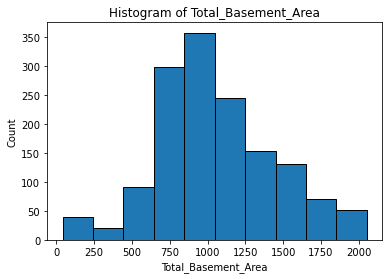

In [244]:
plt.hist(df.Total_Basement_Area,edgecolor = "black")
plt.xlabel("Total_Basement_Area")
plt.ylabel("Count")
plt.title("Histogram of Total_Basement_Area")

good predictor

# 19.First_Floor_Area

In [245]:
df.First_Floor_Area.isnull().sum()

0

In [246]:
df.First_Floor_Area.value_counts()

864     25
1040    16
912     14
848     12
894     12
        ..
1509     1
2515     1
605      1
3138     1
2073     1
Name: First_Floor_Area, Length: 752, dtype: int64

In [247]:
df.First_Floor_Area.value_counts().sum()

1459

Text(0.5, 1.0, 'Histogram of First_Floor_Area')

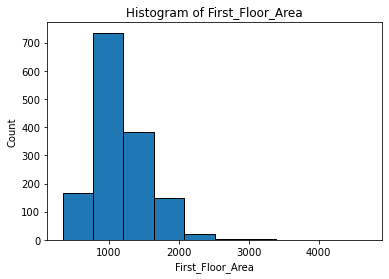

In [248]:
plt.hist(df.First_Floor_Area,edgecolor = "black")
plt.xlabel("First_Floor_Area")
plt.ylabel("Count")
plt.title("Histogram of First_Floor_Area")

Text(0.5, 1.0, 'Normality of First_Floor_Area')

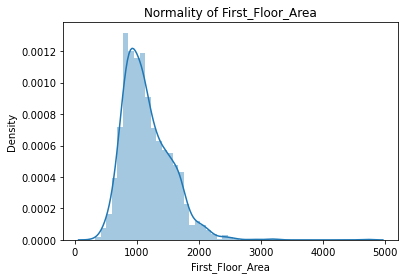

In [249]:
sns.distplot(df.First_Floor_Area)
plt.title('Normality of First_Floor_Area')

Text(0.5, 1.0, 'BoxPlot Of First_Floor_Area')

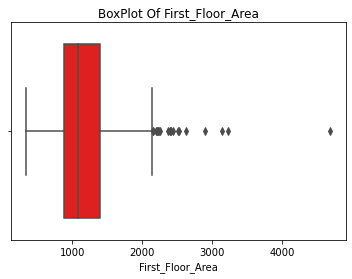

In [250]:
sns.boxplot(df['First_Floor_Area'], color = 'red')
plt.title('BoxPlot Of First_Floor_Area')

In [251]:
IQR = df['First_Floor_Area'].quantile(0.75) - df['First_Floor_Area'].quantile(0.25)
IQR

509.5

In [252]:
upper_limit = df['First_Floor_Area'].quantile(0.75) + (1.5*IQR)
upper_limit

2155.75

In [253]:
df['First_Floor_Area'] = np.where(df['First_Floor_Area'] > upper_limit, upper_limit, df['First_Floor_Area'])

Text(0.5, 1.0, 'BoxPlot Of First_Floor_Area')

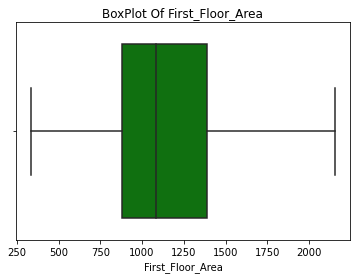

In [254]:
sns.boxplot(df['First_Floor_Area'], color = 'g')
plt.title('BoxPlot Of First_Floor_Area')

Text(0.5, 1.0, 'Histogram of First_Floor_Area')

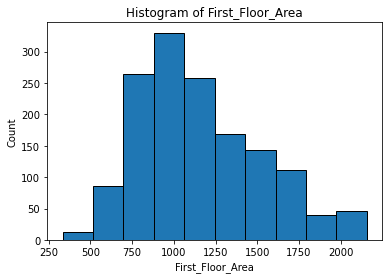

In [255]:
plt.hist(df.First_Floor_Area,edgecolor = "black")
plt.xlabel("First_Floor_Area")
plt.ylabel("Count")
plt.title("Histogram of First_Floor_Area")

In [256]:
np.corrcoef(df['First_Floor_Area'], df.Sale_Price)

array([[1.        , 0.62201535],
       [0.62201535, 1.        ]])

<AxesSubplot:xlabel='First_Floor_Area', ylabel='Sale_Price'>

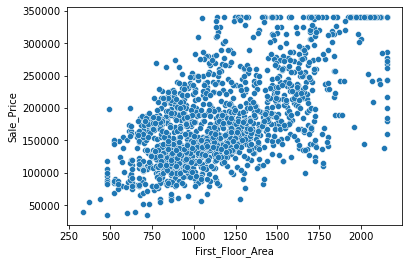

In [257]:
sns.scatterplot('First_Floor_Area', 'Sale_Price', data=df)

good predictor

# 20.Second_Floor_Area

In [258]:
df['Second_Floor_Area'].isnull().sum()

0

In [259]:
df['Second_Floor_Area'].describe()

count    1459.000000
mean      347.230295
std       436.583480
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: Second_Floor_Area, dtype: float64

In [260]:
df['Second_Floor_Area'].value_counts()

0       828
728      10
504       9
546       8
672       8
       ... 
1538      1
914       1
1067      1
1000      1
1152      1
Name: Second_Floor_Area, Length: 417, dtype: int64

In [261]:
df['Second_Floor_Area'].value_counts().sum()

1459

Text(0.5, 1.0, 'Histogram of Second_Floor_Area')

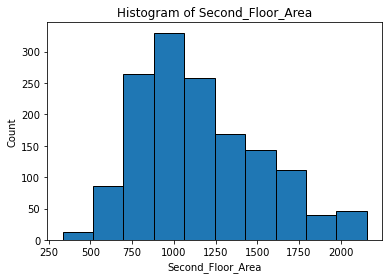

In [262]:
plt.hist(df.First_Floor_Area,edgecolor = "black")
plt.xlabel("Second_Floor_Area")
plt.ylabel("Count")
plt.title("Histogram of Second_Floor_Area")

Text(0.5, 1.0, 'Normality of Second_Floor_Area')

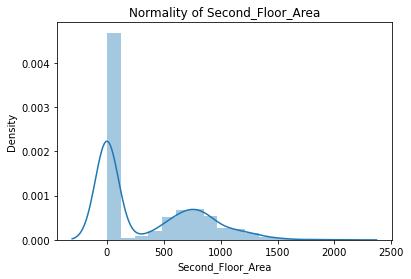

In [263]:
sns.distplot(df['Second_Floor_Area'])
plt.title('Normality of Second_Floor_Area')

Text(0.5, 1.0, 'BoxPlot Of Second_Floor_Area')

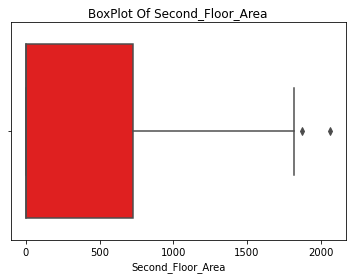

In [264]:
sns.boxplot(df['Second_Floor_Area'], color = 'red')
plt.title('BoxPlot Of Second_Floor_Area')

In [265]:
IQR = df['Second_Floor_Area'].quantile(0.75) - df['Second_Floor_Area'].quantile(0.25)
IQR

728.0

In [266]:
upper_limit = df['Second_Floor_Area'].quantile(0.75) + (1.5*IQR)
upper_limit

1820.0

In [267]:
lower_limit = df['Second_Floor_Area'].quantile(0.25) - (1.5*IQR)
lower_limit

-1092.0

In [268]:
df['Second_Floor_Area'] = np.where(df['Second_Floor_Area'] > upper_limit, upper_limit, df['Second_Floor_Area'])

Text(0.5, 1.0, 'BoxPlot Of Second_Floor_Area')

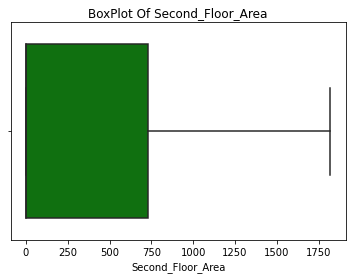

In [269]:
sns.boxplot(df['Second_Floor_Area'], color = 'g')
plt.title('BoxPlot Of Second_Floor_Area')

Text(0.5, 1.0, 'Histogram of Second_Floor_Area')

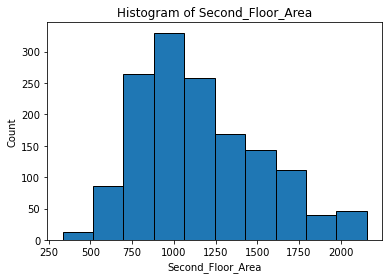

In [270]:
plt.hist(df.First_Floor_Area,edgecolor = "black")
plt.xlabel("Second_Floor_Area")
plt.ylabel("Count")
plt.title("Histogram of Second_Floor_Area")

In [271]:
np.corrcoef(df['Second_Floor_Area'], df.Sale_Price)

array([[1.        , 0.31635083],
       [0.31635083, 1.        ]])

<AxesSubplot:xlabel='Second_Floor_Area', ylabel='Sale_Price'>

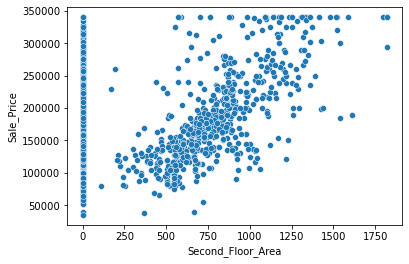

In [273]:
sns.scatterplot('Second_Floor_Area', 'Sale_Price', data=df)

not good predictor

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1459 non-null   int64  
 1   Building_Class             1459 non-null   int64  
 2   Zoning_Class               1459 non-null   object 
 3   Lot_Extent                 1200 non-null   float64
 4   Lot_Size                   1459 non-null   float64
 5   Road_Type                  1459 non-null   object 
 6   Lane_Type                  91 non-null     object 
 7   Property_Shape             1459 non-null   object 
 8   Land_Outline               1459 non-null   object 
 9   Utility_Type               1459 non-null   object 
 10  Lot_Configuration          1459 non-null   object 
 11  Property_Slope             1459 non-null   object 
 12  Neighborhood               1459 non-null   object 
 13  Condition1                 1459 non-null   objec

In [291]:
lst = ['Building_Class', 'Zoning_Class', 'Lot_Size', 'Road_Type', 'Property_Shape', 'Land_Outline', 'Utility_Type', 
       'Property_Slope', 'House_Type', 'Remodel_Year', 'Exterior_Material', 'Exterior_Condition', 'Heating_Quality', 'Air_Conditioning', 
       'Kitchen_Quality', 'BsmtFinSF1', 'BsmtFinSF2', 'Total_Basement_Area', 'First_Floor_Area', 'Second_Floor_Area','Sale_Price']

In [292]:
len(lst)

21

In [293]:
df1 = df.loc[:, lst]

In [294]:
df1

,Building_Class,Zoning_Class,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Property_Slope,House_Type,Remodel_Year,Exterior_Material,Exterior_Condition,Heating_Quality,Air_Conditioning,Kitchen_Quality,BsmtFinSF1,BsmtFinSF2,Total_Basement_Area,First_Floor_Area,Second_Floor_Area,Sale_Price
0,60,RLD,8450.0,Paved,Reg,Lvl,AllPub,GS,TwnhsE,2003,Gd,TA,Ex,Y,Gd,706.0,0,856.0,856.0,854.0,208500.0
1,20,RLD,9600.0,Paved,Reg,Lvl,AllPub,GS,TwnhsE,1976,TA,TA,Ex,Y,TA,978.0,0,1262.0,1262.0,0.0,181500.0
2,60,RLD,11250.0,Paved,IR1,Lvl,AllPub,GS,TwnhsE,2002,Gd,TA,Ex,Y,Gd,486.0,0,920.0,920.0,866.0,223500.0
3,20,RLD,9550.0,Paved,IR1,Lvl,AllPub,GS,TwnhsE,1970,TA,TA,Gd,Y,Gd,216.0,0,756.0,961.0,756.0,140000.0
4,60,RLD,14260.0,Paved,IR1,Lvl,AllPub,GS,TwnhsE,2000,Gd,TA,Ex,Y,Gd,655.0,0,1145.0,1145.0,1053.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,FVR,7500.0,Paved,Reg,Lvl,AllPub,GS,TwnhsE,2005,Gd,TA,Ex,Y,Gd,410.0,0,1221.0,1221.0,0.0,185000.0
1455,60,RLD,7917.0,Paved,Reg,Lvl,AllPub,GS,TwnhsE,2000,TA,TA,Ex,Y,TA,0.0,0,953.0,953.0,694.0,175000.0
1456,20,RLD,13175.0,Paved,Reg,Lvl,AllPub,GS,TwnhsE,1988,TA,TA,TA,Y,TA,790.0,163,1542.0,2073.0,0.0,210000.0
1457,20,RLD,9042.0,Paved,Reg,Lvl,AllPub,GS,TwnhsE,2006,Ex,TA,Ex,Y,Gd,275.0,0,1152.0,1188.0,1152.0,266500.0


In [295]:
df1.isnull().sum()

Building_Class         0
Zoning_Class           0
Lot_Size               0
Road_Type              0
Property_Shape         0
Land_Outline           0
Utility_Type           0
Property_Slope         0
House_Type             0
Remodel_Year           0
Exterior_Material      0
Exterior_Condition     0
Heating_Quality        0
Air_Conditioning       0
Kitchen_Quality        0
BsmtFinSF1             0
BsmtFinSF2             0
Total_Basement_Area    0
First_Floor_Area       0
Second_Floor_Area      0
Sale_Price             0
dtype: int64

In [296]:
trn = df1.iloc[0:1021,]
tst = df1.iloc[1022:1338,]

In [297]:
model_1=smf.ols(formula="Sale_Price~Building_Class + Zoning_Class + Lot_Size + Road_Type + Property_Shape + Land_Outline + Utility_Type + Property_Slope + House_Type + Remodel_Year + Exterior_Material + Exterior_Condition + Heating_Quality + Air_Conditioning + Kitchen_Quality + BsmtFinSF1 + BsmtFinSF2 + Total_Basement_Area + First_Floor_Area + Second_Floor_Area",data = trn).fit()

In [299]:
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     202.1
Date:                Mon, 30 May 2022   Prob (F-statistic):               0.00
Time:                        20:41:57   Log-Likelihood:                -11841.
No. Observations:                1021   AIC:                         2.374e+04
Df Residuals:                     992   BIC:                         2.388e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [300]:
tst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 1022 to 1337
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building_Class       316 non-null    int64  
 1   Zoning_Class         316 non-null    object 
 2   Lot_Size             316 non-null    float64
 3   Road_Type            316 non-null    object 
 4   Property_Shape       316 non-null    object 
 5   Land_Outline         316 non-null    object 
 6   Utility_Type         316 non-null    object 
 7   Property_Slope       316 non-null    object 
 8   House_Type           316 non-null    object 
 9   Remodel_Year         316 non-null    int64  
 10  Exterior_Material    316 non-null    object 
 11  Exterior_Condition   316 non-null    object 
 12  Heating_Quality      316 non-null    object 
 13  Air_Conditioning     316 non-null    object 
 14  Kitchen_Quality      316 non-null    object 
 15  BsmtFinSF1           316 non-null   

In [301]:
x_tst = tst.loc[:,tst.columns != 'Sale_Price']
y_tst = tst.loc[:,tst.columns == 'Sale_Price']

In [302]:
pred_1 = model_1.predict(x_tst)

In [303]:
y_tst_series = y_tst.iloc[:,0]

In [304]:
resd_1 = y_tst_series - pred_1

In [305]:
se_1 = resd_1.pow(2)

In [306]:
sse_1 = se_1.sum()

In [307]:
msse_1 = sse_1/len(se_1)

In [308]:
import math

In [309]:
math.sqrt(msse_1)

28380.506702249862

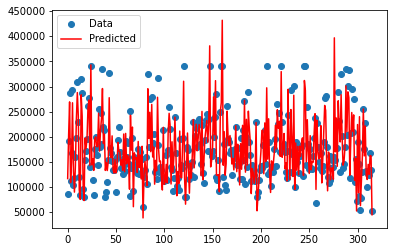

In [315]:
obsno = np.arange(0,316,1)
fig, ax = plt.subplots()
ax.plot(obsno, y_tst_series , "o", label = "Data")
ax.plot(obsno, pred_1, "r-", label = "Predicted")
ax.legend(loc = "best")